<a href="https://colab.research.google.com/github/Bhargavi-Singamsetty/DLT-lab/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import datasets,layers,models
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[:50]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5,
       9, 2, 7, 3, 0, 3], dtype=uint8)

In [ ]:
classes=[' T-shirt/top', 'Trouser','Pullover',' Dress',
'Coat','Sandal',' Shirt','Sneaker','Bag',' Ankle boot']

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

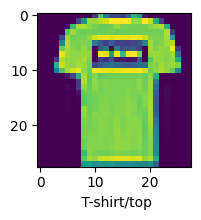

In [ ]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)
plot_sample(x_train,y_train,1)

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
from keras.api._v2.keras import activations
ann=models.Sequential([layers.Flatten(input_shape=(28,28)),layers.Dense(3000,activation='relu'),layers.Dense(1000,activation='relu'),layers.Dense(10,activation='softmax')])

In [ ]:
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.6376 - accuracy: 0.7931
Epoch 2/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.4526 - accuracy: 0.8422
Epoch 3/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.4120 - accuracy: 0.8569
Epoch 4/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.3856 - accuracy: 0.8644
Epoch 5/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.3665 - accuracy: 0.8721


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element)for element in y_pred]
print('classification report : ',classification_report(y_test,y_pred_classes))

313/313 [==============================] - 5s 17ms/step
classification report :                precision    recall  f1-score   support

           0       0.75      0.88      0.81      1000
           1       0.98      0.97      0.97      1000
           2       0.68      0.84      0.76      1000
           3       0.87      0.88      0.87      1000
           4       0.76      0.78      0.77      1000
           5       0.95      0.94      0.94      1000
           6       0.81      0.42      0.56      1000
           7       0.93      0.91      0.92      1000
           8       0.92      0.97      0.94      1000
           9       0.92      0.97      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

